<a href="https://colab.research.google.com/github/lorek/Probability_Course_Labs/blob/main/LAB_LIST_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\(Click above to open the notebook in Google Colab. Then save it to your Google Drive)

# Rozgrzewka: deszcz w Central Parku

W hydrologii rozkład wykładniczy jest wykorzystywany do modelowania zjawisk ekstremalnych, których
przykłady to maksymalny przepływ wody przez koryto rzeki (lub przez zalany obszar wokół koryta) w czasie
powodzi, lub maksymalny dzienny opad w pewnym przedziale czasu (np. miesiącu lub roku).

W pliku `opady_ny.csv` znajduje się dobowa suma opadów (w milimetrach) dla każdego dnia od 1.01.1869 do
26.04.2024. Obliczymy maksima dla wszystkich lat od początku prowadzenia pomiarów i sprawdzimy, czy
rzeczywiście mają one rozkład wykładniczy.

In [21]:

import pandas as pd

# opady_ny.csv -- wczytujemy ten plik z GitHub od razu jako pandas dataframe
url = 'https://raw.githubusercontent.com/lorek/Probability_Course_Labs/main/opady_ny.csv'
df1 = pd.read_csv(url, on_bad_lines='skip',  sep = ';',  decimal=',')


In [22]:
df1.head()

,data,opady
0,1869-01-01,19.0
1,1869-01-02,0.8
2,1869-01-03,NaN
3,1869-01-04,4.5
4,1869-01-05,1.2


In [23]:
import matplotlib.pyplot as plt
import numpy as np

Dla przypomnienia, tak wyglądają gęstość i dystrybuanta rozkładu wykładniczego dla różnych wartości
parametru $\lambda$

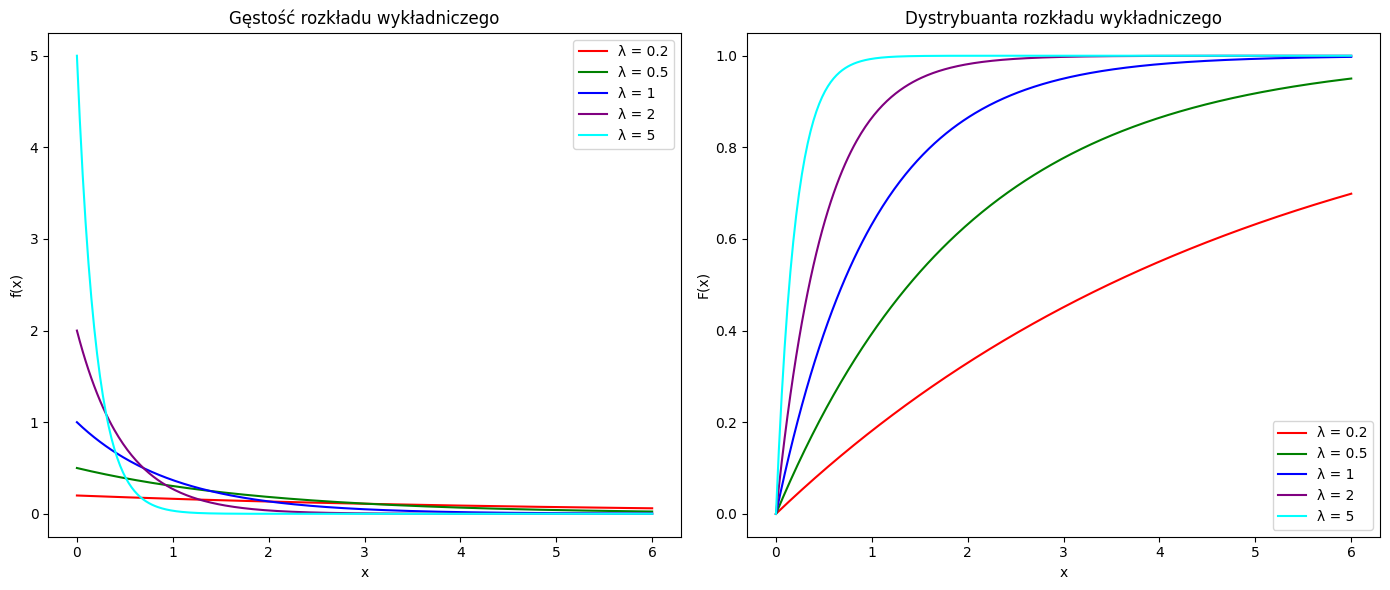

In [24]:
# Wartości parametru lambda
lambdas = [0.2, 0.5, 1, 2, 5]
colors = ['red', 'green', 'blue', 'purple', 'cyan']  # kolory dla różnych wartości lambda
x = np.linspace(0, 6, 400)  # zakres dla x

plt.figure(figsize=(14, 6))

# Wykres dla gęstości rozkładu wykładniczego
plt.subplot(1, 2, 1)
for l, c in zip(lambdas, colors):
    pdf = l * np.exp(-l * x)
    plt.plot(x, pdf, label=f'λ = {l}', color=c)
plt.title('Gęstość rozkładu wykładniczego')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Wykres dla dystrybuanty rozkładu wykładniczego
plt.subplot(1, 2, 2)
for l, c in zip(lambdas, colors):
    cdf = 1 - np.exp(-l * x)
    plt.plot(x, cdf, label=f'λ = {l}', color=c)
plt.title('Dystrybuanta rozkładu wykładniczego')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

plt.tight_layout()
plt.show()

Z tymi wykresami porównamy histogram oraz wykres dystrybuanty empirycznej rocznych maksimów dziennej
sumy opadów. W tym celu musimy najpierw obliczyć same maksima.

In [25]:
# Ekstrakcja roku z daty
df1['rok'] = pd.to_datetime(df1['data']).dt.year

In [26]:
df1.head()

,data,opady,rok
0,1869-01-01,19.0,1869
1,1869-01-02,0.8,1869
2,1869-01-03,NaN,1869
3,1869-01-04,4.5,1869
4,1869-01-05,1.2,1869


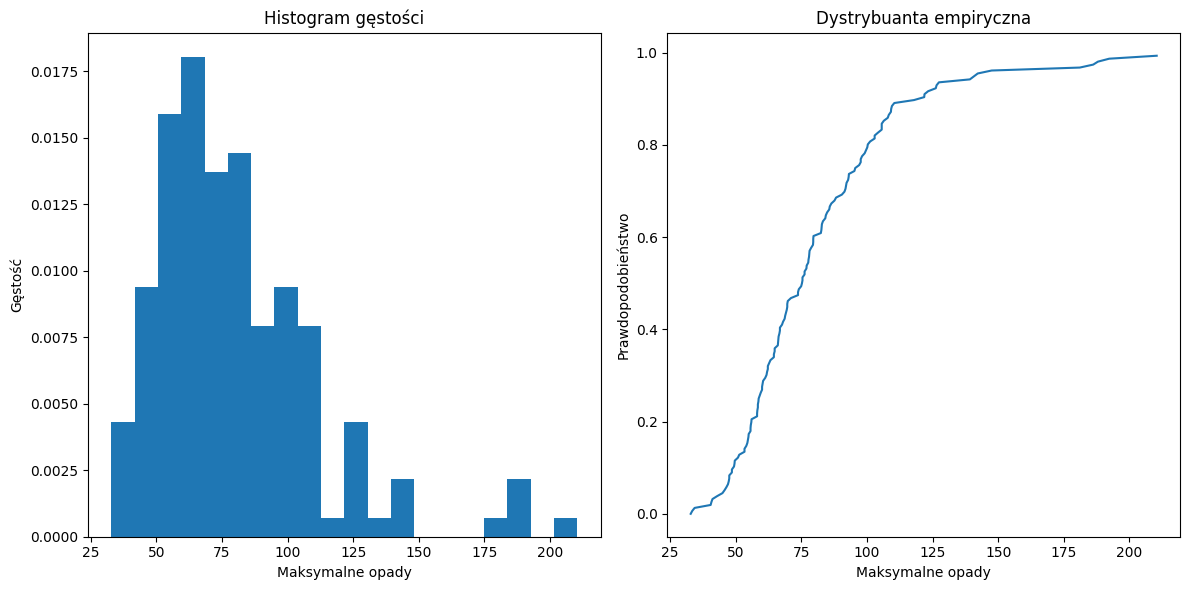

In [27]:
# Grupowanie danych po roku i wybieranie maksymalnych opadów dla każdego roku
maksima_ny = df1.groupby('rok')['opady'].max()

# Histogram maksymalnych opadów
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(maksima_ny, bins=20, density=True)
plt.title("Histogram gęstości")
plt.xlabel('Maksymalne opady')
plt.ylabel('Gęstość')

# Dystrybuanta empiryczna
plt.subplot(1, 2, 2)
sorted_max = np.sort(maksima_ny)
plt.plot(sorted_max, np.linspace(0, 1, len(sorted_max), endpoint=False))
plt.title("Dystrybuanta empiryczna")
plt.xlabel('Maksymalne opady')
plt.ylabel('Prawdopodobieństwo')

plt.tight_layout()
plt.show()

# Ćwiczenie: wykładniczy, czy nie wykładniczy?

Już na pierwszy rzut oka widać, że wykresy sporządzone dla zmiennej maksima_ny mają inne kształty, niż
wykresy powyżej utworzone dla rozkładu wykładniczego. Czy to oznacza, że modele hydrologiczne źle opisują
rzeczywistość? Spróbujemy znaleźć argumenty przemawiające za taką tezą, jak również przeciw niej. Na
koniec przekonamy się, że uzasadnianie dwóch przeciwstawnych tez może mieć sens.

## Własność braku pamięci

Rozkład wykładniczy jest jedynym ciągłym rozkładem, który ma własność braku pamięci. Wykorzystamy to
do zweryfikowania tezy postawionej na oko, na podstawie samych kształtów wykresów. Dla przypomnienia:
zmienna losowa $X$ ma własność braku pamięci, gdy
$$\mathbb{P}(X>t+s | X>t ) = \mathbb{P}(X>s), \quad s,t>0.$$

* *Pytanie 1.*  Czy zmienna X = `maksima_ny` ma własność braku pamięci? Dla
$s\in \{40, 60, 80, 100, 120, 140\}$ oraz $t \in \{30, 50, 70, 90\}$ wyznacz $p_{s,t} = \mathbb{P}(X > t + s|X > t)$. Następnie dodaj do wykresu dystrybuanty
empirycznej punkty o współrzędnych $(s,1-p_{s,t})$, oznaczając kolorem wartość parametru $t$. Dodaj legendę i zinterpretuj wyniki.

## Pomysł 1: nie opad, tylko nadwyżka opadu

Gdyby odrzucić obserwacje z najmniejszymi wartościami (np. poniżej 60 mm), to zarówno histogram, jak  i wykres dystrybuanty empirycznej, przypominałyby wykresy dla rozkładu wykładniczego. Stwórz nową
zmienną $Y = X - L$, opisującą nie sam opad, a nadwyżkę opadu nad ustalonym poziomem odniesienia L (np. 60 mm)

* *Pytanie 2*. Narysuj histogram i wykres dystrybuanty empirycznej dla $Y$. Zakładając, że zmienna $Y$ ma rozkład wykładniczy Exp($\lambda$), jaki jest parametr $\lambda$ tego rozkładu? Dorysuj do utworzonych wykresów odpowiednio
gęstość i dystrybuantę wyznaczonego rozkładu wykładniczego.

* *Pytanie 3*. Dla jakiego poziomu odniesienia rozkład najlepiej pokrywa się z wykładniczym?

## Pomysł 2: nie wykładniczy, tylko gamma

Wykresy dla zmiennej `maksima_ny` są zbliżone kształtem do wykresów dla rozkładu gamma. Jest to rozkład o dwóch parametrach ($\alpha$ = shape, $\beta$ = rate).

* *Pytanie 4*. Dla ustalonych wartości $\alpha$ i $\beta$  można wyznaczyć średnią i modę (tzn. wartość, dla której gęstość rozkładu jest największa). Jak odwrócić ten proces, czyli na podstawie średniej i mody wyznaczyć $\alpha$ i $\beta$?

* *Pytanie 5*. Oblicz średnią dla zmiennej `maksima_ny`. Jak można odczytać modę z histogramu? Użyj tych dwóch wielkości do wyznaczenia parametrów $\alpha$ i $\beta$, a następnie dorysuj do wykresów gęstość i dystrybuantę
wyznaczonego rozkładu.

## Czyli dwa rozkłady jednocześnie?

Czy to możliwe, żeby zmienna `maksima_ny` dobrze przybliżała się dwoma różnymi rozkładami? Wiemy już, że przybliżenie rozkładem wykładniczym nie działa dobrze dla małych wartości. Sprawdźmy, czy dla dużych wartości przybliżenia oboma rozkładami istotnie różnią się od siebie. Niech $Y, Z$ oznaczają zmienne losowe,
którymi przybliżamy zmienną `maksima_ny`. Zakładamy, że $Y - L \sim $Exp($\lambda$) oraz $Z \sim $Gamma($\alpha,\beta$), przy
czym parametry $\lambda, \alpha, \beta$ to te wyznaczone w pytaniach 2 i 4.

* *Pytanie 6*. Narysuj wykres funkcji  $f (x) = {\mathbb{P}(Y >x)\over \mathbb{P}(Z >x)}$. Dla jakich $x$ wartość funkcji $f$ jest zbliżona do jedynki?

* *Pytanie 7*. Rozbieżność pomiędzy ogonami rozkładów zmiennych $Y$ i $Z$ dla największych wartości zmiennej `maksima_ny` jest dość duża. Dlaczego nie widać tego na wykresie dystrybuanty empirycznej (z dorysowanymi dystrybuantami $Y$ i $Z$)?

# Zadanie: deszcz w Las Vegas

W pliku `opady_lv.csv`, który wczytujemy tak:

In [28]:
# opady_ny.csv -- wczytujemy ten plik z GitHub od razu jako pandas dataframe
url = 'https://raw.githubusercontent.com/lorek/Probability_Course_Labs/main/opady_lv.csv'
df_lv = pd.read_csv(url, on_bad_lines='skip',  sep = ';',  decimal=',')
df_lv.head()

,data,opady
0,2000-08-01,0.0
1,2000-08-02,NaN
2,2000-08-03,NaN
3,2000-08-04,0.0
4,2000-08-05,0.0


zebrane są dane dotyczące dziennej sumy opadów na lotnisku w Las Vegas. Pomiary
są tam prowadzone znacznie krócej niż w Nowym Jorku, dlatego zamiast maksymalnej dziennej sumy opadów
w ciągu roku będziemy rozważać maksymalną dzienną sumę opadów w ciągu miesiąca. Mamy więc dwie
zasadnicze różnice w stosunku do sytuacji w Central Parku:

* O ile dla każdego roku rozkład opadów powinien być taki sam, o tyle rozkłady dla poszczególnych
miesięcy mogą się różnić.
* W Las Vegas deszcz pada bardzo rzadko, więc nie są wyjątkiem sytuacje, kiedy nie było go w ogóle
przez cały miesiąc.

Sprawdź, czy pomimo tych różnic miesięczne maksima maksymalnej dziennej sumy opadów mają rozkład
gamma lub - po obcięciu najmniejszych wartości - wykładniczy.

* *Zadanie 1*. Oblicz średnie sumy opadów w poszczególnych miesiącach roku. Czy różnica pomiędzy najbardziej
suchym i najbardziej deszczowym miesiącem jest wyraźna?

* *Zadanie 2*. Wyznacz miesięczne maksima dziennej sumy opadów dla każdego miesiąca od początku prowadzenia
obserwacji. Narysuj histogram i wykres dystrybuanty empirycznej.
* *Zadanie 3*. Dla ustalonego progu (np. L = 5) sprawdź, czy po usunięciu wszystkich wartości poniżej tego
progu, pozostałe obserwacje mają rozkład wykładniczy. Dla jakiej wartości L przybliżenie jest najlepsze?
* *Zadanie 4*. Sprawdź, czy dane mają rozkład gamma. Ponieważ tym razem moda wynosi zero, nie można na
jej podstawie wyznaczyć parametrów rozkładu. Jak można zrobić to inaczej?